<a href="https://colab.research.google.com/github/rizkyyfaauzi21/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

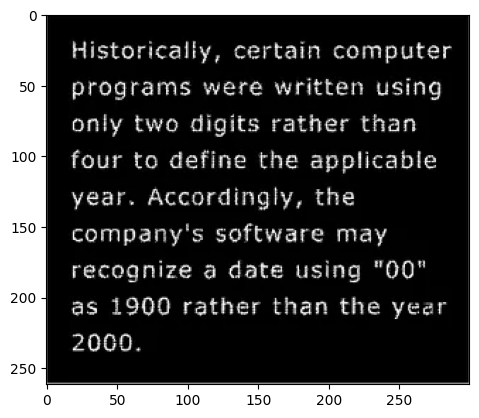

In [4]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/morphology.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
# Define the structuring element (SED) - 3x3 cross
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

In [6]:
def dilation(image, struct_element):
    # Get dimensions of the image and structuring element
    img_h, img_w = image.shape
    se_h, se_w = struct_element.shape
    pad_h, pad_w = se_h // 2, se_w // 2

    # Create a padded version of the image to apply dilation at borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Prepare the output image
    dilated_image = np.zeros_like(image)

    # Perform dilation
    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            # Extract the region of interest (ROI)
            roi = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Apply dilation (max value where structuring element is 1)
            dilated_image[i - pad_h, j - pad_w] = np.max(roi[struct_element == 1])

    return dilated_image

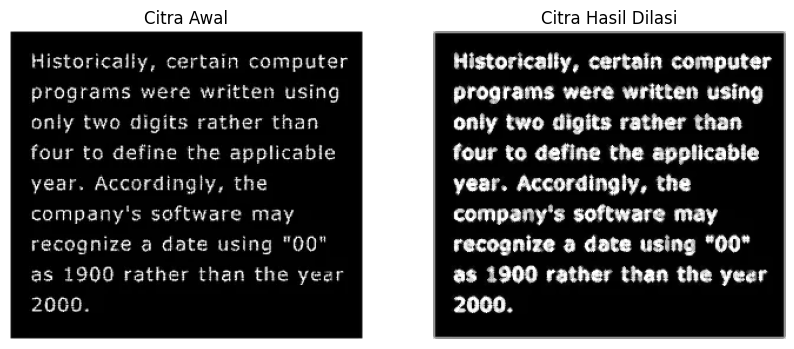

In [7]:
# Apply the dilation function
dilated_image = dilation(image, structuring_element)

# Plot the original and dilated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


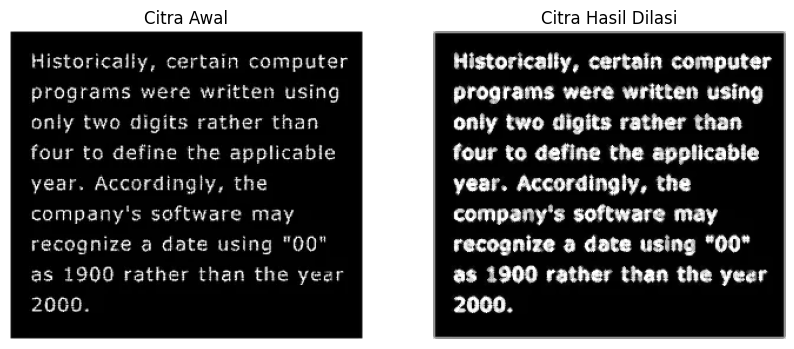

In [8]:
# Define a 3x3 cross-shaped structuring element
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Print the structuring element
print("Structuring Element (Cross 3x3):")
print(structuring_element)

# Apply dilation using OpenCV's morphologyEx function
dilated_image = cv2.morphologyEx(image, cv2.MORPH_DILATE, structuring_element)

# Plot the original and dilated images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

In [9]:
def erosi(image, kernel):
    m, n = image.shape
    km, kn = kernel.shape
    pad = km // 2
    eroded = np.zeros((m, n), dtype=np.uint8)

    padded_image = np.pad(image, pad, mode='constant', constant_values=255)

    for i in range(m):
        for j in range(n):
            window = padded_image[i:i+km, j:j+kn]
            eroded[i, j] = np.min(window[kernel == 1])

    return eroded

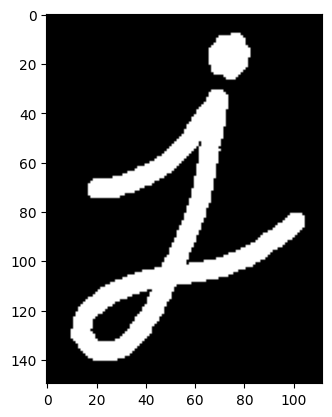

In [11]:
# Load citra dalam format grayscale
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/j.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

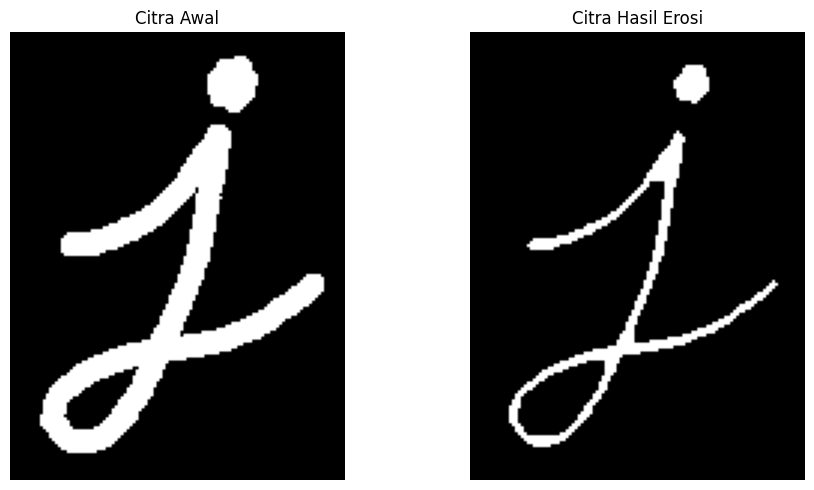

In [12]:
# Buat kernel (Structuring Element) 5x5
kernel = np.ones((5, 5), np.uint8)

# Aplikasikan erosi
eroded_image = erosi(image, kernel)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.tight_layout()
plt.show()

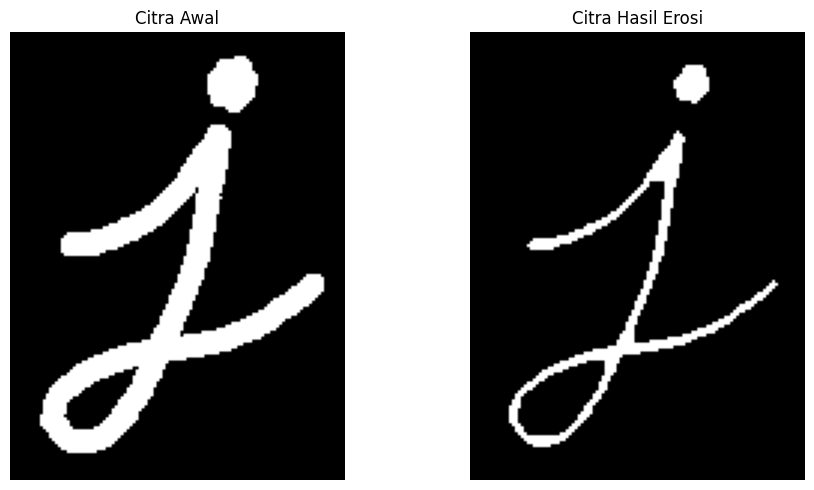

In [13]:
# Buat Structuring Element (kernel) berbentuk square 5x5
kernel = np.ones((5,5), np.uint8)

# Aplikasikan erosi
eroded_image = cv2.erode(image, kernel, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
def closing(image, kernel):
    dilated = dilation(image, kernel)
    closed = erosi(dilated, kernel)
    return closed

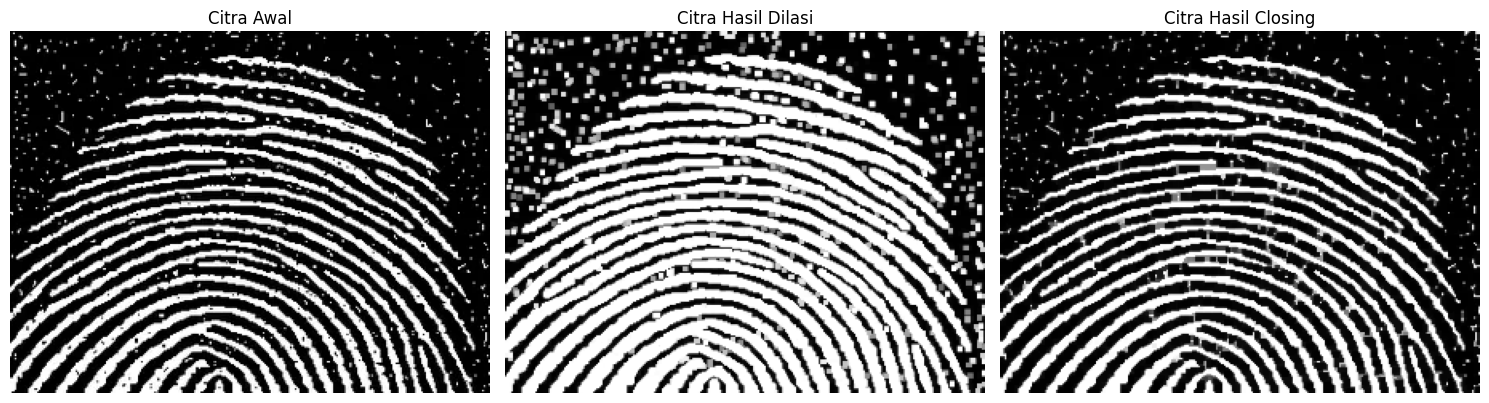

In [16]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/fingerprint.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Buat kernel 3x3
kernel = np.ones((3, 3), np.uint8)

# Aplikasikan closing
closed_image = closing(image, kernel)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(dilation(image, kernel), cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.subplot(133)
plt.imshow(closed_image, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
def create_cross_se(size):
    se = np.zeros((size, size), dtype=np.uint8)
    se[size//2, :] = 1
    se[:, size//2] = 1
    return se

In [19]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Assets/j.png', cv2.IMREAD_GRAYSCALE)

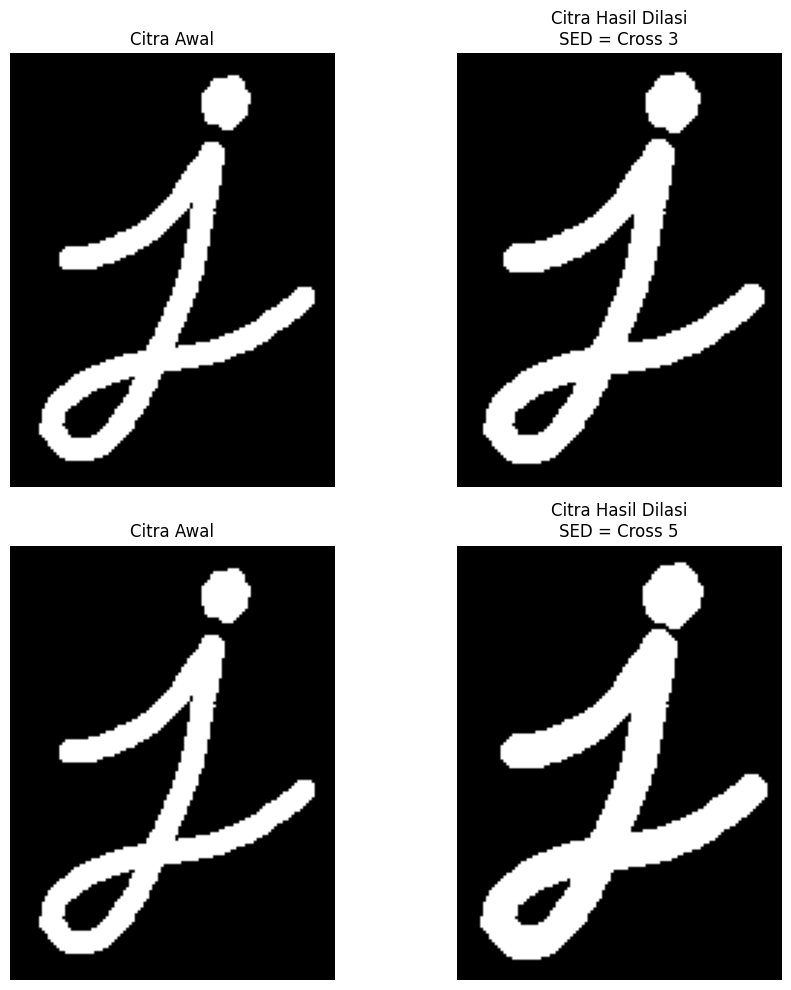

In [20]:
# Buat Structuring Element Cross 3x3 dan 5x5
se_cross_3 = create_cross_se(3)
se_cross_5 = create_cross_se(5)

# Aplikasikan dilasi
dilated_3 = cv2.dilate(image, se_cross_3, iterations=1)
dilated_5 = cv2.dilate(image, se_cross_5, iterations=1)

# Tampilkan hasil
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(222)
plt.imshow(dilated_3, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 3')
plt.axis('off')

plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(224)
plt.imshow(dilated_5, cmap='gray')
plt.title('Citra Hasil Dilasi\nSED = Cross 5')
plt.axis('off')

plt.tight_layout()
plt.show()

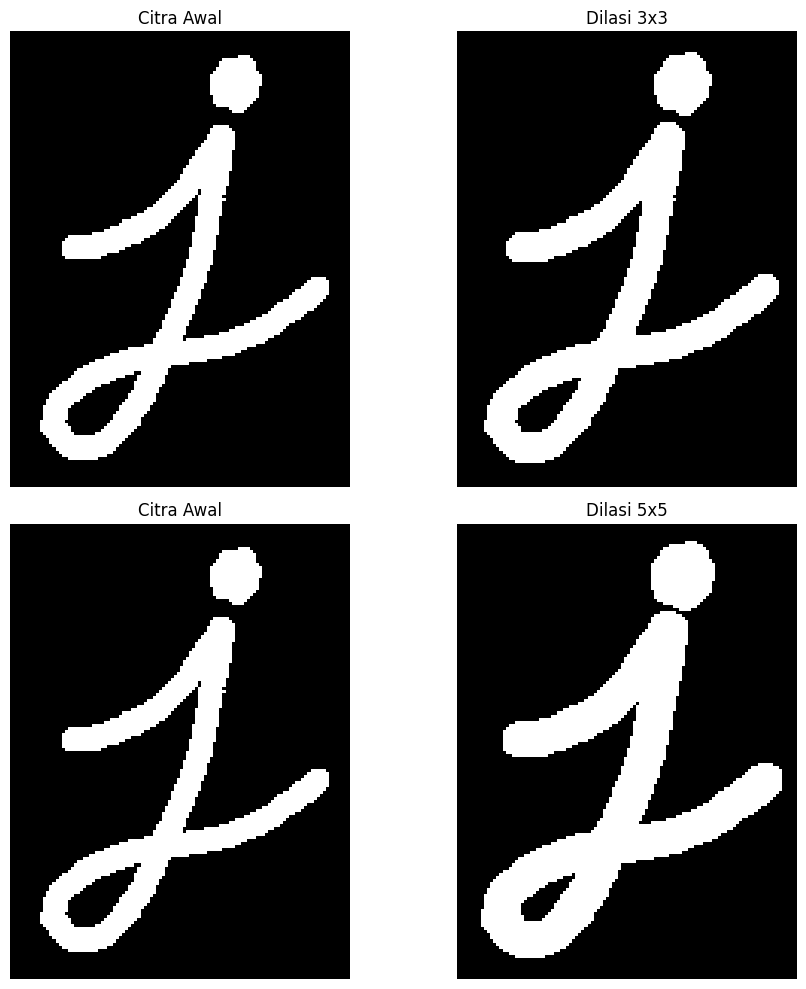

In [21]:
# Create circular structuring elements for dilation
kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Apply dilation with 3x3 kernel
dilated_3x3 = cv2.dilate(image, kernel_3x3, iterations=1)

# Apply dilation with 5x5 kernel
dilated_5x5 = cv2.dilate(image, kernel_5x5, iterations=1)

# Plotting the original and dilated images
plt.figure(figsize=(10, 10))

# Row 1: Original image and dilated with 3x3 kernel
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi 3x3')
plt.axis('off')

# Row 2: Original image and dilated with 5x5 kernel
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi 5x5')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

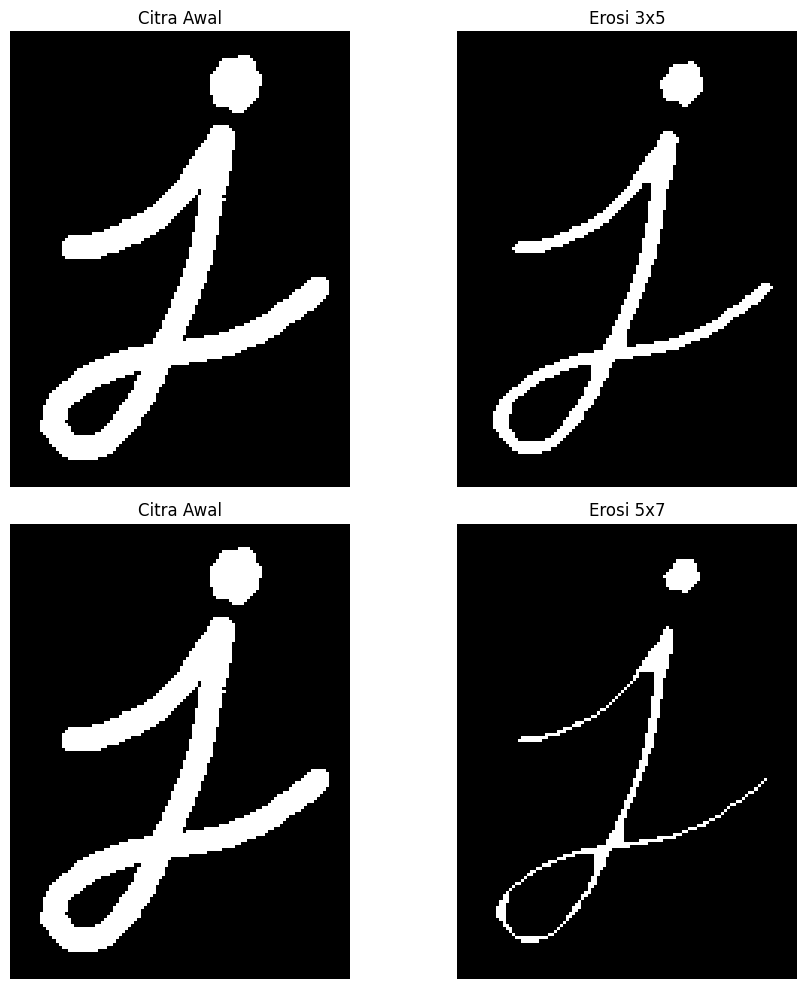

In [22]:

# Create rectangular structuring elements for erosion
kernel_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
kernel_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Apply erosion with 3x5 kernel
eroded_3x5 = cv2.erode(image, kernel_3x5, iterations=1)

# Apply erosion with 5x7 kernel
eroded_5x7 = cv2.erode(image, kernel_5x7, iterations=1)

# Plotting the original and eroded images
plt.figure(figsize=(10, 10))

# Row 1: Original image and eroded with 3x5 kernel
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_3x5, cmap='gray')
plt.title('Erosi 3x5')
plt.axis('off')

# Row 2: Original image and eroded with 5x7 kernel
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_5x7, cmap='gray')
plt.title('Erosi 5x7')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

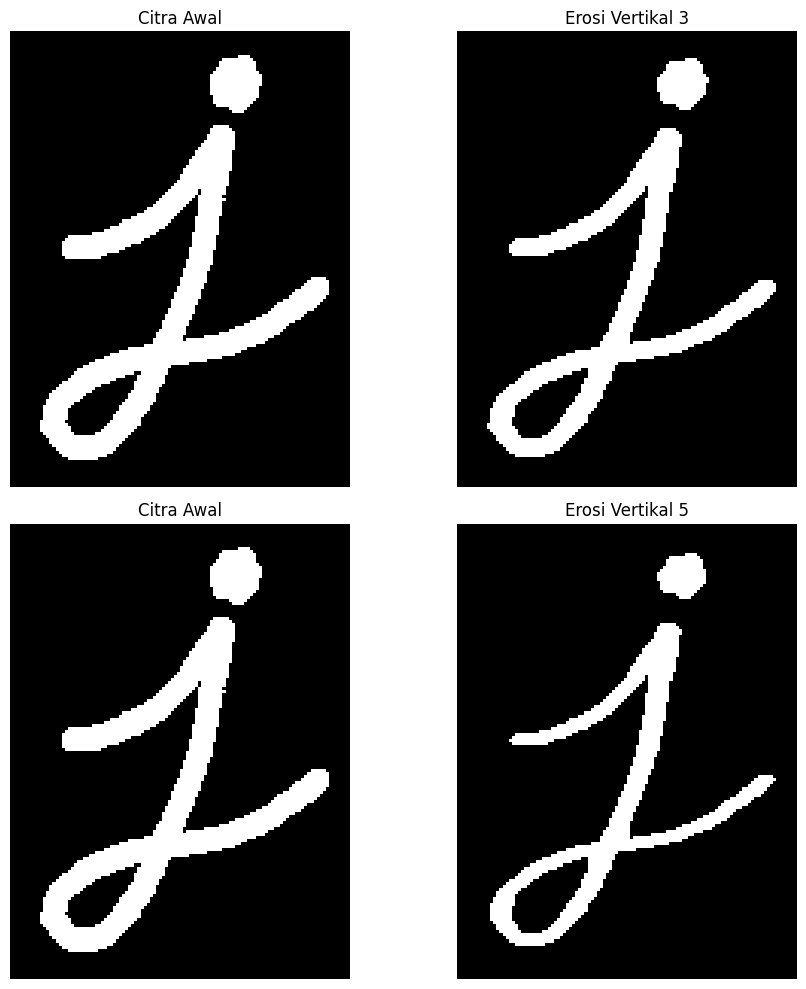

In [23]:
# Create vertical line structuring elements for erosion
kernel_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))  # Vertical line of height 3
kernel_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Vertical line of height 5

# Apply erosion with 3-pixel vertical kernel
eroded_vertical_3 = cv2.erode(image, kernel_vertical_3, iterations=1)

# Apply erosion with 5-pixel vertical kernel
eroded_vertical_5 = cv2.erode(image, kernel_vertical_5, iterations=1)

# Plotting the original and eroded images
plt.figure(figsize=(10, 10))

# Row 1: Original image and eroded with vertical kernel of height 3
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_vertical_3, cmap='gray')
plt.title('Erosi Vertikal 3')
plt.axis('off')

# Row 2: Original image and eroded with vertical kernel of height 5
plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_vertical_5, cmap='gray')
plt.title('Erosi Vertikal 5')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()